#  Ejercicio.

Un satélite se lanza desde una altitud $H = 772$ km sobre el nivel del mar, con una velocidad inicial $v_{0} = 6700$ $m/s$ en la dirección que se muestra.

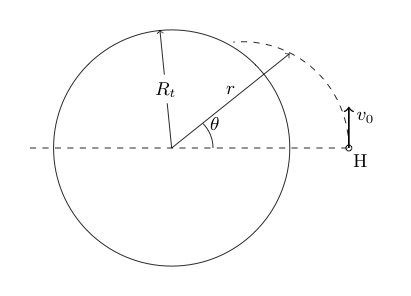

El conjunto de EDO que describen el movimiento del satélite son:
$$
\begin{align*}
\ddot{r} = r  \dot{\theta}^{2} - \dfrac{G M_{t}}{r^{2}}  \hspace{2cm} \ddot{\theta} = - \dfrac{2 \dot{r}\dot{\theta}}{r}
\end{align*}
$$
donde $r$ y $\theta$ son las coordenadas polares del satélite.

Las constantes involucradas en las expresiones, son:
$$
\begin{eqnarray*}
G &=& 6.672 \times 10^{-11} \mbox{ m}^{3} \mbox{kg}^{-1} \mbox{s}^{2} \\
M_{t} &=& 5.9742 \times 10^{24} \mbox{ kg, Masa de la Tierra} \\
R_{e} &=& 6378.14 \mbox{ km, radio de la Tierra al nivel del mar} 
\end{eqnarray*}
$$

## Problemas a resolver.
1. Obtén el conjunto de EDO-1 y las condiciones iniciales del problema, de la forma $\dot{\mathbf{y}} = \mathbf{F}(x,\mathbf{y})$, $\mathbf{y}(0) = \mathbf{b}$.
2. Integra las EDO1 en el tiempo en que se lanza el satélite y choca en su regreso a la Tierra.
3. Calcula el lugar del impacto, con $\theta$.

### Inciso 1.

Tenemos que
$$
\begin{align*}
G \, M_{t} &= (6.672 \times 10^{-11}) (5.9742 \times 10^{24})  = 3.9860 \times 10^{14} \mbox{m}^{3} \mbox{s}^{2} \end{align*}
$$

Ocupando la notación que hemos venido desarrollando, llegamos al sistema:
$$
\begin{align*}
\mathbf{y} = \begin{bmatrix}
y_{0} \\
y_{1} \\
y_{2} \\
y_{3}
\end{bmatrix} =
\begin{bmatrix}
r \\
\dot{r} \\
\theta \\
\dot{\theta}
\end{bmatrix}
\end{align*}
$$

Por lo que el conjunto equivalente de EDO1, resulta ser:
$$
\begin{align*}
\dot{\mathbf{y}} = \begin{bmatrix}
\dot{y}_{0} \\
\dot{y}_{1} \\
\dot{y}_{2} \\
\dot{y}_{3}
\end{bmatrix} =
\begin{bmatrix}
y_{1} \\
y_{0} y_{3}^{2} - 3.9860 \times 10^{14}/y_{0}^{2} \\
y_{3} \\
-2 y_{1} y_{3} / y_{0}
\end{bmatrix}
\end{align*}
$$

Las condiciones iniciales para el problema resultan ser:

$$
\begin{align*}
r(0) &= R_{t} + H = (6378.14+772) \times 10^{3} = 7.15014 \times 10^{6} \mbox{ m} \\
\dot{r}(0) &= 0 \\
\theta(0) &= 0 \\
\dot{\theta}(0) &= \dfrac{v_{0}}{r(0)} = \dfrac{6700}{7.15014 \times 10^{6}} = 0.937045 \times 10^{-3} \mbox{ rad/s}
\end{align*}
$$

Por tanto;
$$
\begin{align*}
\mathbf{y}(0) = 
\begin{bmatrix}
7.15014 \times 10^{6} \\
0 \\
0 \\
0.937045 \times 10^{3}
\end{bmatrix}
\end{align*}
$$

### Inciso 2: Integración de las EDO1.

Usaremos la función <code>integrate.odeint</code> para integrar el sistema de EDO1.

De lo visto en clase, se necesita la función <font color="blue"> F{y, t} </font> que incluye el sistema de EDO1.

El período de integración, es decir, el valor del tiempo que tarda en caer el satélite y choca con la Tierra, hay que estimarlo tentativamente.

In [ ]:
import numpy as np
from prettytable import PrettyTable
from scipy.integrate import odeint

def F(y, t):
    F = np.zeros(4)
    F[0] = y[1]
    F[1] = y[0] * (y[3]**2) - 3.9860e14 / (y[0]**2)
    F[2] = y[3]
    F[3] = -2.0 * y[1] * y[3]/y[0]
    return F

t = np.linspace(0, 1200, 100)
y0 = np.array([7.1514e6, 0., 0., 0.937045e-3])
y1 = odeint(F, y0, t)

tabla = PrettyTable()
tabla.field_names = ['tiempo', 'altura', 'velocidad']

for i in range(len(t)):
    tabla.add_row(['%3.5f' % t[i], '%1.6e' % y1[i][0], '%1.5e' % y1[i][1]])

print(tabla)

El satélite choca con la Tierra cuando $r$ es igual a $R_{t}=6.37814 \times 10^{6}$ m. 

Buscamos en la tabla anterior, los valores de tiempo para los cuales ocurre el contacto del satélite con la Tierra. Para ello usamos una función de numpy, que nos devuelve el índice para el cual se satisface la expresión del valor mínimo de la diferencia entre los elementos de la lista $y1[;.0]$ y el radio de la Tierra $R_{t}$.

In [ ]:
Rt = 6.37814e6

indice = np.argmin((np.abs(y1[:,0] - Rt)))

print(t[indice], y1[indice][0])
print(t[indice+1], y1[indice+1][0])

Vemos que el choque del satélite con la Tierra ocurre en el intervalo de tiempo: $(1030.3030, 1042.4242)$ segundos.

Intervalo de tiempo al choque.

Un valor de $t$ más preciso, lo podemos obtener mediante una interpolación  polinomial, pero si no queremos una precisión alta, con una interpolación lineal, bastará.

Consideremos que $1030.3030 + \Delta t$ el tiempo para el impacto, por lo que escribimos:
$$
\begin{align*}
r (1030.3030 + \Delta t) = R_{t}
\end{align*}
$$

Desarrollando $r$ con dos términos de la serie de Taylor, tenemos que:
$$
\begin{align*} 
r(1030.3030) + \dot{r}(1030.3030) \Delta t &= R_{t} \\
6.386228 \times 10^{6} + (-1.385053 \times 10^{3}) \Delta t &= R_{t}
\end{align*}
$$

que al despejar el intervalo de tiempo:
$$
\begin{align*}
\Delta t =  \dfrac{R_{t} - 6.386228 \times 10^{6}}{-1.385053 \times 10^{3}} =  5.8394 \, \text{s}
\end{align*}
$$

<font color="red">Por lo que el tiempo de impacto es a los $1036.1424$ segundos</code>, luego de haber sido lanzado.

### Inciso 3. Lugar del impacto.

La coordenada $\theta$ del impacto, la podemos calcular de una manera similar, para ello desarrollamos dos términos de la serie de Taylor
$$
\begin{align*}
\theta(1030.3030 + \Delta t) &= \theta(1030.3030) + \dot{\theta}(1030.3030)\Delta t \\
\theta(1036.1424) &= 1.043431 + (1.175043 \times 10^{-3} )(5.8394) \\
\theta(1036.1424) &= 1.5029 \mbox{ rad} = \\
\theta(1036.1424) &= 60.18^{\circ}
\end{align*}
$$